# 505 模型正则化
加入模型正则化，新的目标函数：$$J(\theta) = MSE(y,\hat{y};\theta)+\alpha \frac{1}{2}\sum_{i=1}^n\theta _i^2$$

## 岭回归 Ridge Regression——L2 正则

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

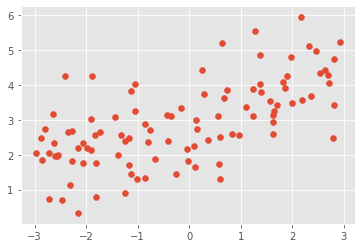

In [3]:
plt.scatter(x, y)

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

167.9401085999025

[-3, 3, 0, 6]

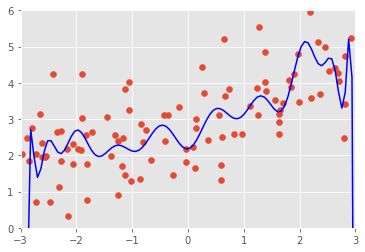

In [7]:
X_plot = np.linspace(-3, 3, 100).reshape(100,1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot, y_plot, color='b')
plt.axis([-3,3,0,6])

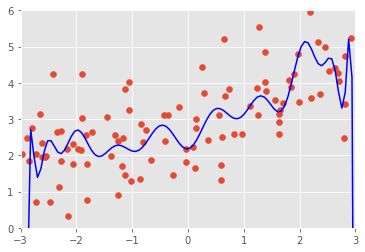

In [8]:
def plot_model(model):
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(X_plot)
    
    plt.scatter(x, y)
    plt.plot(X_plot, y_plot, color='b')
    plt.axis([-3,3,0,6])
    
plot_model(poly_reg)

### 使用岭回归

In [9]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

In [10]:
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.3233492754136291

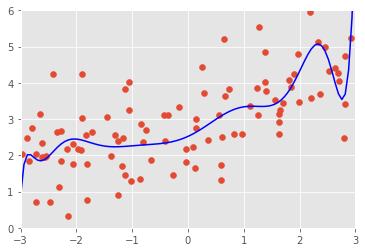

In [11]:
plot_model(ridge1_reg)

In [12]:
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1888759304218461

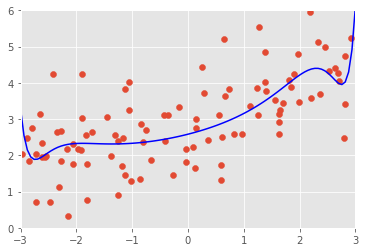

In [13]:
plot_model(ridge2_reg)

In [14]:
ridge3_reg = RidgeRegression(20, 100)         # 这个时候的均方差已经高于 alpha = 1 的时候了
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.3196456113086197

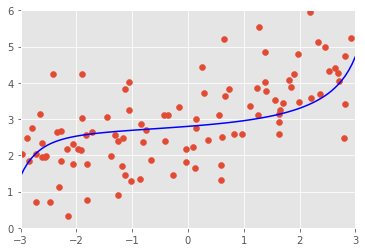

In [15]:
plot_model(ridge3_reg)

In [16]:
ridge4_reg = RidgeRegression(20, 10000000)
ridge4_reg.fit(X_train, y_train)

y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)

1.8408455590998372

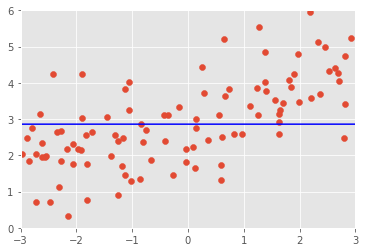

In [17]:
plot_model(ridge4_reg)     # alpha 趋近于无穷大的时候， 相当于 所有的 θ 等于零 这条直线更趋近于截距 3，即 y=3

In [18]:
np.mean(X_train)

-0.13395088745530392

## LASSO 回归——L1正则
$$J(\theta) = MSE(y,\hat{y};\theta)+\alpha \sum_{i=1}^n \left|\theta _i\right|$$

In [19]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

In [20]:
lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)

y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.149608084325997

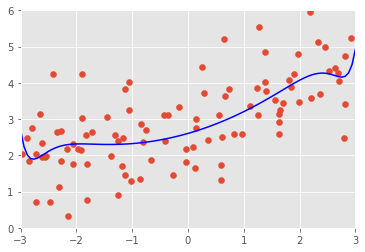

In [21]:
plot_model(lasso1_reg)

In [22]:
lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)

y2_predict = lasso2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1213911351818648

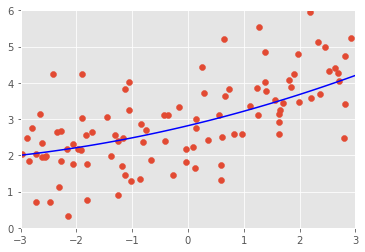

In [23]:
plot_model(lasso2_reg)

In [24]:
lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)

y3_predict = lasso3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.8408939659515595

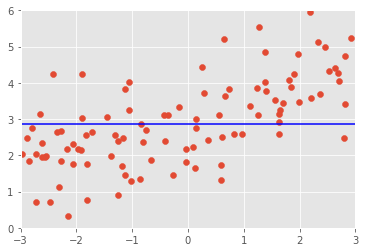

In [25]:
plot_model(lasso3_reg)

### L0 正则 一般使用L1代替，NP难的问题
$$J(\theta) = MSE(y,\hat{y};\theta)+min\{ number-of-non-zero-\theta\}$$

### 弹性网 Elastic Net: 结合了L1和L2
$$J(\theta) = MSE(y,\hat{y};\theta)+ r \alpha \sum_{i=1}^n \left|\theta _i\right|+ \frac{1-r}{2}\alpha \sum_{i=1}^n\theta _i^2$$